In [4]:
!python HeatmapGenerator.py test/00017137_004.png

                    Predicted Binary  Ground Truth
Finding                                           
Atelectasis                      0.0           1.0
Cardiomegaly                     0.0           0.0
Effusion                         0.0           1.0
Infiltration                     1.0           1.0
Mass                             1.0           0.0
Nodule                           1.0           0.0
Pneumonia                        0.0           0.0
Pneumothorax                     1.0           1.0
Consolidation                    0.0           0.0
Edema                            0.0           0.0
Emphysema                        0.0           0.0
Fibrosis                         0.0           0.0
Pleural_Thickening               1.0           0.0
Hernia                           0.0           0.0
Threshold:  [0.10952242 0.02511445 0.12471801 0.14887203 0.04166623 0.04834145
 0.01131331 0.0417387  0.04133456 0.01996091 0.02339982 0.01842346
 0.02608163 0.00371073]
Prediction:  t

D:\anaconda\anaconda3\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [6]:
imgPath = 'test/00017137_004.png'
name, tail = imgPath.split(".")
heatmapPath = name + "_heatmap." + tail

Populating the interactive namespace from numpy and matplotlib


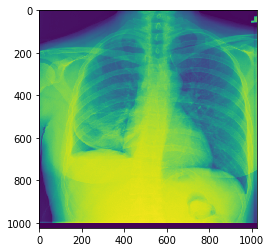

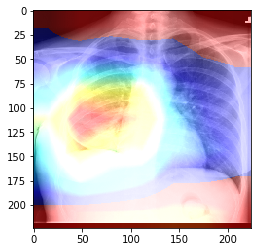

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(imgPath)
imgplot = plt.imshow(img)
plt.show()
img2=mpimg.imread(heatmapPath)
imgplot2 = plt.imshow(img2)
plt.show()

In [8]:
m, n = name.split("/")
n = n + ".png"
labels = open("label.txt", "r+")
for label in labels:
    l = label.split(" ")
    a, b = l[0].split("/")
    if b in n:
        print (b)

00017137_004.png


In [10]:
import numpy as np
tpr = np.load("tpr.npy")
fpr = np.load("fpr.npy")
a = np.ones(14)
b = np.zeros(14)
for i in range(14):
    a[i] = 100
for i in range(14):
    for j in range (len(tpr[i])):
        tmp = np.linalg.norm((fpr[i][j]) - (1 - tpr[i][j]))
        #print (tpr[i][j], fpr[i][j])
        #print (tmp)
        if tmp < a[i]:
            a[i] = tmp
            b[i] = j       
print (a)
print (b)

FileNotFoundError: [Errno 2] No such file or directory: 'tpr.npy'

In [2]:
thresholds = np.load("threshold.npy")
c = np.zeros(14)
for i in range(0, 14):
    c[i] = thresholds[i][int(b[i])]
    print (c[i])
    

0.10952241718769073
0.025114450603723526
0.12471801042556763
0.1488720327615738
0.04166622832417488
0.04834144562482834
0.011313306167721748
0.04173870012164116
0.04133455827832222
0.019960908219218254
0.023399820551276207
0.01842346042394638
0.02608163096010685
0.0037107288371771574


In [3]:
np.save("best_threshold.npy", c)

In [42]:
print (pred)

NameError: name 'pred' is not defined